<span style="color:#a33f1f;text-align:center">
    
# MEEC/SA - TOMSA 2024/2025
## TRAB - Título do trabalho
<span style="color:#000000;text-align:left">
    
#### Realizado por:
    
> #### 1191845 - Daniel Peixoto    
> #### 1141513 - Paulo Cruz       
> #### Data: 22/10/2024


## Conteúdo
[1.](#i1) Resumo
    
[2.](#i2) Enquadramento

[3.](#i3)  Código realizado

[4.](#i4) Execução

<span id="i1"></span>

## 1. Resumo

O trabalho realizado, visa a criação de um um _script_ utilizando a linguagem de programação _Python_, juntamente com as suas bibliotecas nativas, e possivelmente outras, que sejam úteis na resolução do tema em causa.


<span id="i2"></span>

## 2. Equadramento

O objetivo do trabalho é o desenvolvimento de um _script_ em _Python_ que permita a leitura, interpretação e visualização de trajetórias reais a 3 dimensões, realizadas por veículos autónomos ou sistemas robóticos. O funcionamento geral do _script_ pode ser descrito pelo seguinte fluxograma:

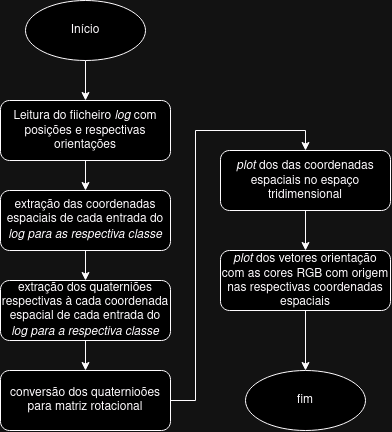


Como descrito pelo fluxograma, o _script_ recebe por parâmetro a localização de um ficheiro _log_ simplificado, retirado dum ROS bag com os pontos de posição e de orientação do veículo. Após isso, o _script_ faz a análise do ficheiro, retirando dele os dados necessários de posição e orientação. Os dados relativos à posição, não sofrem nenhum tratamento, ao contrário dos dados de orientação que necessitam de algum processamento para que possam ser desenhados em forma de vetores no gráfico.

Os dados de orientação nos ficheiros de _log_ estão sob a forma de quatérnios. Quatérnios são uma extensão dos números complexos, a álgebra dos quatérnios é comumente usada como método para rotação de um corpo no espaço tridimensional. Embora os ângulos de Euler são relativamente fáceis de entender e representar essas rotações, as vantagens da utilização de quatérnios são por exemplo evitar a ocorrência do fenómeno de singularidade de _Gimbal Lock_ que ocorre quando dois eixos de rotação se alinham e um grau de liberdade de movimento é perdido. Outras vantagens como suavidade obtida entre as rotações e eficiência computacional. [[4](#ref4)]

Podem ser representados da seguinte forma: $$ 𝑞 = 𝑞_0 + 𝑞_1 𝑖 + 𝑞_2 𝑗 + 𝑞_3 𝑘 $$

onde  $q_0, q_1, q_2, q_3 \in \mathbb{R}$, e os símbolos $i$, $j$, and $k$ são utilizados para denotar as três componentes imaginárias do quatérnio. E as seguintes relações podem ser estabelecidas : $i^2 = j^2 = k^2 = ijk = -1$ e $𝑖 𝑗 = 𝑘, 𝑗 𝑘 = 𝑖,  𝑘 𝑖 = 𝑗$

Uma forma mais conveniente de representar a rotação de um vetor utilizando um quatérnio é transformando este em uma matriz de rotação 3x3 da seguinte forma:

$$
q =
\begin{pmatrix}
2q_0^2 + 2q_1^2 - 1 & 2q_1q_2 - 2q_0q_3 & 2q_1q_3 + 2q_0q_2 \\
2q_1q_2 + 2q_0q_3 & 2q_0^2 + 2q_2^2 - 1 & 2q_2q_3 - 2q_0q_1 \\
2q_1q_3 - 2q_0q_2 & 2q_2q_3 + 2q_0q_1 & 2q_0^2 + 2q_3^2 - 1
\end{pmatrix}
$$

Dado que os dados de orientação são armazenados como quatérnios nos ficheiros de log, é necessário realizar a conversão apropriada para representar esses quatérnios em termos de vetores no espaço tridimensional. Como já mencionado, os quatérnios são uma ferramenta poderosa para lidar com rotações em 3D devido à sua robustez em evitar problemas como o Gimbal Lock, e sua capacidade de interpolar suavemente entre rotações.
Conversão de Quatérnios para Matrizes de Rotação

A forma mais direta de usar quatérnios para rotacionar um vetor é convertendo-os em matrizes de rotação, como visto anteriormente. O quatérnio $q=q0+q1i+q2j+q3kq=q0​+q1​i+q2​j+q3​k$ pode ser interpretado como uma rotação em torno de um eixo unitário no espaço tridimensional. Ao converter o quaternião numa matriz de rotação $3×3$, podemos aplicar essa matriz diretamente a qualquer vetor para obter sua orientação após a rotação.

A fórmula para a matriz de rotação derivada do quatérnio foi apresentada anteriormente e permite transformar qualquer vetor tridimensional $$v=(vx,vy,vz)$$ através de multiplicação matricial, como:
$$v_{rot}=Rq⋅v$$

Onde $R_q$ é a matriz de rotação correspondente ao quatérnio $q$, e ${v_rot}$ é o vetor rotacionado. Este processo consiste em multiplicar a matriz ${R_q$}​$ pelo vetor de posição $v$, gerando um novo vetor que está orientado segundo a rotação definida pelo quatérnio.


Vetores de Eixos Locais


Como cada ponto de posição $P$ tem associado a si um quatérnio $q$, é possível calcular os vetores de eixos locais correspondentes às direções $XX, YY e ZZ$ daquele ponto no espaço tridimensional. Esses vetores são simplesmente os eixos base $(1,0,0)$, $(0,1,0)$ e $(0,0,1)$, rotacionados pela matriz de rotação derivada do quatérnio. Em termos práticos, podemos aplicar a matriz $R_q$​ a cada um dos vetores base para obter os vetores de orientação local: O vetor $X_{local}$ é dado pela rotação do vetor $(1,0,0)$, o vetor $Y_{local}$ é dado pela rotação do vetor $(0,1,0)$, o vetor $Z_{local}$ é dado pela rotação do vetor $(0,0,1)$

Esses vetores locais representam os eixos de orientação no espaço 3D para cada ponto da trajetória, que podem ser desenhados como vetores no gráfico tridimensional para ilustrar a direção do objeto no espaço em cada momento da trajetória.


Aplicação nos Gráficos


O objetivo final é visualizar esses vetores de orientação em cada ponto da trajetória. Isso é feito desenhado a trajetória utilizando os conjuntos de pontos $(x,y,z)$ e sobrepondo os vetores de orientação em cada ponto da trajetória. Para cada ponto $P$, são desenhados três vetores: $X_{local}$, $Y_{local}$, e $Z_{local}$, representando a orientação do veículo naquele instante.



## Integração de Dados de Temperatura com o Interpolador na Trajetória do Robô

A segunda parte deste trabalho visa integrar informações de um sensor de temperatura, obtidas a partir de registos de log, com os dados da trajetória de um robô móvel. Esta fusão de dados permitirá uma representação mais rica e detalhada da trajetória, incorporando as medições do sensor ao longo do percurso. Além disso, pretendemos explorar o uso de interpoladores disponibilizados pela biblioteca SciPy, com o intuito de estimar valores de temperatura em pontos da trajetória onde não existem medições diretas, proporcionando uma análise contínua e detalhada dos dados adquiridos.

### Escolha do Interpolador *CubicSpline*

O interpolador *CubicSpline* foi selecionado para o processamento dos dados de temperatura devido à sua capacidade de modelar uma curva suave e contínua entre os pontos de dados registados, característica essencial para uma representação realista e confiável de variáveis que tendem a mudar gradualmente, como a temperatura. Diferente de interpoladores lineares, que criam transições abruptas entre pontos, o *CubicSpline* gera uma curva suave, evitando descontinuidades e oscilações bruscas, as quais seriam fisicamente improváveis no contexto de medições de temperatura ao longo da trajetória.

### Contexto Matemático e Suavidade da Curva

A suavidade oferecida pelo *CubicSpline* é particularmente relevante para dados de temperatura, onde mudanças de valores geralmente ocorrem de maneira progressiva. O interpolador utiliza polinómios cúbicos entre cada par de pontos para garantir uma transição suave. Matemáticamente, o interpolador *CubicSpline* é definido em cada intervalo \([x_i, x_{i+1}]\) por uma função cúbica da forma:

\[
S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3
\]

onde \(a_i\), \(b_i\), \(c_i\) e \(d_i\) são coeficientes determinados de modo a satisfazer as seguintes condições:

1. **Continuidade**: A função \(S(x)\) é contínua ao longo de toda a trajetória, sem saltos abruptos entre pontos de dados.
2. **Continuidade da Primeira Derivada**: A primeira derivada \(S'(x)\) é contínua, garantindo que a taxa de variação da temperatura muda de forma gradual.
3. **Continuidade da Segunda Derivada**: A segunda derivada \(S''(x)\) é também contínua, o que resulta numa curvatura progressiva e suave, sem oscilações abruptas, proporcionando uma transição natural entre os intervalos.

Essas condições de suavidade tornam o *CubicSpline* particularmente adequado para representar dados de temperatura, pois evitam variações não realistas e contribuem para uma representação fiável e contínua.






<span id="i3"></span>

## 3. Código realizado

In [34]:
"""
Created on Thu Sep 20 2024

@author: pbg

@info: exemplo de classe Ponto no âmbito da u.c. tomsa

@version: 0.1

"""

class Ponto(object):
    """Um ponto 3D no plano cartesiano"""

    def __init__(self, x=0, y=0, z=0):
        """
        Constrói um objeto ponto dado as coordenadas x, y e z.

        Parâmetros:
            x (float): coordenada x no plano cartesiano 3D
            y (float): coordenada y no plano cartesiano 3D
            z (float): coordenada z no plano cartesiano 3D
        """
        self._x = x
        self._y = y
        self._z = z

    def __repr__(self) -> str:
        return f"{type(self).__name__}(x={self._x}, y={self._y}, z={self._z})"

    def __str__(self) -> str:
        return '[ %2.1f, %2.1f, %2.1f]' % (self._x, self._y, self._z)

    """
    Métodos de acesso para os valores das coordenadas.
    """
    @property
    def x(self):
        """
        Retorna:
            x (float): coordenada x no plano cartesiano 3D
        """
        return self._x

    @property
    def y(self):
        """
        Retorna:
            y (float): coordenada y no plano cartesiano 3D
        """
        return self._y

    @property
    def z(self):
        """
        Retorna:
            z (float): coordenada z no plano cartesiano 3D
        """
        return self._z

    """
    Definir os valores das coordenadas.
    """
    @x.setter
    def x(self, x):
        """
        Parâmetros:
            x (float): coordenada x no plano cartesiano 3D
        """
        self._x = x

    @y.setter
    def y(self, y):
        """
        Parâmetros:
            y (float): coordenada y no plano cartesiano 3D
        """
        self._y = y

    @z.setter
    def z(self, z):
        """
        Parâmetros:
            z (float): coordenada z no plano cartesiano 3D
        """
        self._z = z

In [35]:
class Tempo:
    """
    @author: Paulo Cruz e Daniel Peixoto

    @info: exemplo de classe Tempo no âmbito da u.c. TOMSA

    Representa as informações de tempo associadas à trajetória.

    Atributos:
        _secs (int): Número de segundos.
        _nsecs (int): Número de nanosegundos.
    """

    def __init__(self):
        self._secs: int
        self._nsecs: int

    def __str__(self):
        return f"sec: {self._secs}, nsec: {self._nsecs}"

    @property
    def secs(self):
        """
        Retorna:
            int: Número de segundos.
        """
        return self._secs

    @secs.setter
    def secs(self, secs):
        """
        Define o número de segundos.

        Parâmetros:
            secs (int): Número de segundos.
        """
        self._secs = secs

    @property
    def nsecs(self):
        """
        Retorna:
            int: Número de nanosegundos.
        """
        return self._nsecs

    @nsecs.setter
    def nsecs(self, nsecs):
        """
        Define o número de nanosegundos.

        Parâmetros:
            nsecs (int): Número de nanosegundos.
        """
        self._nsecs = nsecs

In [36]:
class Header:
    """
    @author: Paulo Cruz e Daniel Peixoto

    @info: exemplo de classe Header no âmbito da u.c. TOMSA

    Representa o cabeçalho de um ponto da trajetória.

    Atributos:
        _seq (int): Sequência única do ponto.
        _stamp (Tempo): Informações de tempo associadas ao ponto.
        _frame_id (str): ID do quadro de referência utilizado.
    """

    def __init__(self, seq: int, stamp: Tempo, frame_id: str) -> None:
        self._seq = seq
        self._stamp = stamp
        self._frame_id = frame_id

    def __str__(self):
        return f"Header(seq={self._seq}, stamp={self._stamp}, frame_id={self._frame_id})"

    @property
    def seq(self):
        """
        Retorna:
            int: Sequência única do ponto.
        """
        return self._seq

    @seq.setter
    def seq(self, seq):
        """
        Define a sequência única do ponto.

        Parâmetros:
            seq (int): Sequência única do ponto.
        """
        self._seq = seq

    @property
    def stamp(self):
        """
        Retorna:
            Tempo: Informações de tempo associadas ao ponto.
        """
        return self._stamp

    @stamp.setter
    def stamp(self, stamp):
        """
        Define as informações de tempo associadas ao ponto.

        Parâmetros:
            stamp (Tempo): Objeto Tempo contendo as informações temporais do ponto.
        """
        self._stamp = stamp

    @property
    def frame_id(self):
        """
        Retorna:
            str: ID do quadro de referência utilizado.
        """
        return self._frame_id

    @frame_id.setter
    def frame_id(self, frame_id):
        """
        Define o ID do quadro de referência utilizado.

        Parâmetros:
            frame_id (str): ID do quadro de referência.
        """
        self._frame_id = frame_id

In [37]:
class Orientacao:
    """
    @author: Paulo Cruz e Daniel Peixoto

    @info: exemplo de classe Orientacao no âmbito da u.c. TOMSA

    Um quatérnio representa a orientação no espaço 3D.
    Quatérnios são usados para representar rotações no espaço 3D, esta classe fornece métodos para converter o quatérnio em uma matriz de rotação.

    Componentes do Quatérnio:
    - q_0: parte escalar (real)
    - q_1, q_2, q_3: parte vetorial (componentes imaginárias correspondentes aos eixos ( x, y, z ))

    A matriz de rotação R(q) derivada do quatérnio ( q = (q_0, q_1, q_2, q_3) ) é calculada como:

        R(q) = [[2(q_0^2 + q_1^2) - 1, 2(q_1q_2 - q_0q_3), 2(q_1q_3 + q_0q_2)],
                [2(q_1q_2 + q_0q_3), 2(q_0^2 + q_2^2) - 1, 2(q_2q_3 - q_0q_1)],
                [2(q_1q_3 - q_0q_2), 2(q_2q_3 + q_0q_1), 2(q_0^2 + q_3^2) - 1]]

    """

    def __init__(self, q_0: float, q_1: float, q_2: float, q_3):
        """
        Inicializa o quatérnio com os componentes q_0, q_1, q_2, q_3.

        Parâmetros:
        - q_0: parte escalar (real)
        - q_1, q_2, q_3: parte vetorial (componentes imaginárias correspondentes aos eixos x, y, z)
        """
        self._q_0 = q_0  # parte escalar (real)
        self._q_1 = q_1  # parte imaginária correspondente ao eixo x
        self._q_2 = q_2  # parte imaginária correspondente ao eixo y
        self._q_3 = q_3  # parte imaginária correspondente ao eixo z

    def RotationMatrix(self):
        """
        Converte o quatérnio em uma matriz de rotação 3x3.

        A matriz de rotação é derivada do quatérnio da seguinte forma:

        R(q) = [[2(q_0^2 + q_1^2) - 1, 2(q_1q_2 - q_0q_3), 2(q_1q_3 + q_0q_2)],
                [2(q_1q_2 + q_0q_3), 2(q_0^2 + q_2^2) - 1, 2(q_2q_3 - q_0q_1)],
                [2(q_1q_3 - q_0q_2), 2(q_2q_3 + q_0q_1), 2(q_0^2 + q_3^2) - 1]]

        Retorna:
        - Um array numpy 3x3 representando a matriz de rotação.
        """
        q_0, q_1, q_2, q_3 = self._q_0, self._q_1, self._q_2, self._q_3
        return np.array([
            [2 * (q_0 ** 2 + q_1 ** 2) - 1, 2 * (q_1 * q_2 - q_0 * q_3), 2 * (q_1 * q_3 + q_0 * q_2)],
            [2 * (q_1 * q_2 + q_0 * q_3), 2 * (q_0 ** 2 + q_2 ** 2) - 1, 2 * (q_2 * q_3 - q_0 * q_1)],
            [2 * (q_1 * q_3 - q_0 * q_2), 2 * (q_2 * q_3 + q_0 * q_1), 2 * (q_0 ** 2 + q_3 ** 2) - 1]
        ])

    def RotateVector(self, v):
        """
        Roda um vetor 3D v usando o quatérnio.

        Parâmetros:
        - v: Um vetor 3D (array numpy de tamanho 3) a ser rotacionado.

        Retorna:
        - Um vetor 3D (array numpy) rotacionado de acordo com a orientação do quatérnio.
        """
        R = self.RotationMatrix()
        return R.dot(v)

    @property
    def q_0(self):
        """
        Retorna:
            float: Parte escalar (real) do quatérnio.
        """
        return self._q_0

    @q_0.setter
    def q_0(self, q_0):
        """
        Define a parte escalar (real) do quatérnio.

        Parâmetros:
            q_0 (float): Valor da parte escalar.
        """
        self._q_0 = q_0

    @property
    def q_1(self):
        """
        Retorna:
            float: Componente imaginário correspondente ao eixo x.
        """
        return self._q_1

    @q_1.setter
    def q_1(self, q_1):
        """
        Define o componente imaginário correspondente ao eixo x.

        Parâmetros:
            q_1 (float): Valor da componente imaginária no eixo x.
        """
        self._q_1 = q_1

    @property
    def q_2(self):
        """
        Retorna:
            float: Componente imaginário correspondente ao eixo y.
        """
        return self._q_2

    @q_2.setter
    def q_2(self, q_2):
        """
        Define o componente imaginário correspondente ao eixo y.

        Parâmetros:
            q_2 (float): Valor da componente imaginária no eixo y.
        """
        self._q_2 = q_2

    @property
    def q_3(self):
        """
        Retorna:
            float: Componente imaginário correspondente ao eixo z.
        """
        return self._q_3

    @q_3.setter
    def q_3(self, q_3):
        """
        Define o componente imaginário correspondente ao eixo z.

        Parâmetros:
            q_3 (float): Valor da componente imaginária no eixo z.
        """
        self._q_3 = q_3

In [38]:
class Pose:
    """
    @author: Paulo Cruz e Daniel Peixoto

    @info: exemplo de classe Pose no âmbito da u.c. TOMSA

    Representa uma pose composta por posição e orientação no espaço 3D.

    Atributos:
        _posicao (Ponto): Posição 3D representada por um objeto Ponto.
        _orientacao (Orientacao): Orientação 3D representada por um objeto Orientacao.
    """

    def __init__(self, posicao: Ponto, orientacao: Orientacao):
        self._posicao = posicao  # Posição é representada por um objeto Ponto
        self._orientacao = orientacao  # Orientação é representada por um objeto Orientacao

    def __str__(self):
        return f"Posição: {self._posicao}, Orientação: {self._orientacao}"

    @property
    def posicao(self):
        """
        Retorna:
            Ponto: A posição 3D.
        """
        return self._posicao

    @posicao.setter
    def posicao(self, posicao):
        """
        Define a posição 3D.

        Parâmetros:
            posicao (Ponto): Objeto Ponto contendo a posição 3D.
        """
        self._posicao = posicao

    @property
    def orientacao(self):
        """
        Retorna:
            Orientacao: A orientação 3D.
        """
        return self._orientacao

    @orientacao.setter
    def orientacao(self, orientacao):
        """
        Define a orientação 3D.

        Parâmetros:
            orientacao (Orientacao): Objeto Orientacao contendo a orientação 3D.
        """
        self._orientacao = orientacao


In [39]:
class PoseWithHeader:
    """
    @author: Paulo Cruz e Daniel Peixoto

    @info: exemplo de classe PoseWithHeader no âmbito da u.c. TOMSA

    Combina as informações de cabeçalho com a pose para um ponto da trajetória.

    Atributos:
        _header (Header): Informações de cabeçalho associadas ao ponto.
        _pose (Pose): Informações de posição e orientação associadas ao ponto.
    """

    def __init__(self, header: Header, pose: Pose):
        self._header = header
        self._pose = pose

    def __str__(self):
        return f"Header: {self._header}, Pose: {self._pose}"

    @property
    def header(self):
        """
        Retorna:
            Header: As informações de cabeçalho associadas ao ponto.
        """
        return self._header

    @header.setter
    def header(self, header):
        """
        Define as informações de cabeçalho associadas ao ponto.

        Parâmetros:
            header (Header): Objeto Header contendo as informações de cabeçalho.
        """
        self._header = header

    @property
    def pose(self):
        """
        Retorna:
            Pose: As informações de posição e orientação associadas ao ponto.
        """
        return self._pose

    @pose.setter
    def pose(self, pose):
        """
        Define as informações de posição e orientação associadas ao ponto.

        Parâmetros:
            pose (Pose): Objeto Pose contendo as informações de posição e orientação.
        """
        self._pose = pose


In [40]:
class Tempo:
    """
    @author: Paulo Cruz e Daniel Peixoto

    @info: exemplo de classe Tempo no âmbito da u.c. TOMSA

    Representa as informações de tempo associadas à trajetória.

    Atributos:
        _secs (int): Número de segundos.
        _nsecs (int): Número de nanosegundos.
    """

    def __init__(self):
        self._secs: int
        self._nsecs: int

    def __str__(self):
        return f"sec: {self._secs}, nsec: {self._nsecs}"

    @property
    def secs(self):
        """
        Retorna:
            int: Número de segundos.
        """
        return self._secs

    @secs.setter
    def secs(self, secs):
        """
        Define o número de segundos.

        Parâmetros:
            secs (int): Número de segundos.
        """
        self._secs = secs

    @property
    def nsecs(self):
        """
        Retorna:
            int: Número de nanosegundos.
        """
        return self._nsecs

    @nsecs.setter
    def nsecs(self, nsecs):
        """
        Define o número de nanosegundos.

        Parâmetros:
            nsecs (int): Número de nanosegundos.
        """
        self._nsecs = nsecs


In [43]:
class Temperatura:
    """
    @author: Paulo Cruz e Daniel Peixoto

    @info: exemplo de classe Temperatura no âmbito da u.c. TOMSA

    Representa os dados de temperatura de um veículo, compostos por múltiplos objetos TempratureWithHeader.

    Atributos:
        _pontosTemperatura (list): Lista de objetos TempratureWithHeader que representam os pontos de temperatura ao longo do tempo.
        _nome (str): Nome dos dados de temperatura.
    """

    def __init__(self) -> None:
        self._pontosTemperatura = []
        self._nome = ""

    def ReadLogTempratura(self, pathFile):
        """Lê um arquivo de log de temperatura e adiciona à lista de objetos TempratureWithHeader"""
        header_data = {}
        countTemperaturas = 0
        countPontosValidos = 0
        temperatura = None
        variancia = None
        flagHeader = False

        with open(pathFile, 'r') as f:
            for index, line in enumerate(f, start=1):
                line = line.strip()
                # Ignorar linhas vazias ou inválidas
                if not line:
                    continue

                try:
                    # Iniciar a leitura de um novo header
                    if line.startswith("header:"):
                        countTemperaturas += 1
                        flagHeader = True
                        header_data = {}
                        tempo = Tempo()
                        temperatura = None
                        variancia = None

                    # Processar dados do header
                    if flagHeader:
                        if line.startswith("frame_id:"):
                            header_data['frame_id'] = line.split(":")[1].strip()
                        elif line.startswith("seq:"):
                            try:
                                header_data['seq'] = int(line.split(":")[1].strip())
                            except ValueError:
                                flagHeader = False
                                continue
                        elif line.startswith("nsecs:"):
                            try:
                                tempo.nsecs = int(line.split(":")[1].strip())
                            except ValueError:
                                flagHeader = False
                                continue
                        elif line.startswith("secs:"):
                            try:
                                tempo.secs = int(line.split(":")[1].strip())
                            except ValueError:
                                flagHeader = False
                                continue
                        elif line.startswith("temperature:"):
                            try:
                                temperatura = float(line.split(":")[1].strip())
                            except ValueError:
                                continue
                        elif line.startswith("variance:"):
                            try:
                                variancia = float(line.split(":")[1].strip())
                            except ValueError:
                                continue

                    # Verificar se temos todos os dados necessários para criar um ponto de temperatura
                    if (header_data and hasattr(tempo, 'nsecs') and hasattr(tempo, 'secs')
                        and temperatura is not None
                        and variancia is not None
                        and "frame_id" in header_data
                        and "seq" in header_data):

                        try:
                            # Criar objetos correspondentes para a temperatura
                            header = Header(header_data['seq'], tempo, header_data['frame_id'])
                            novaTemperatura = TempratureWithHeader(header, temperatura, variancia)
                            self._pontosTemperatura.append(novaTemperatura)
                            countPontosValidos += 1  # Incrementar contagem de pontos válidos

                            # Imprimir o ponto recém-adicionado
                            # print(novaTemperatura)
                        except Exception:
                            # Ignorar este ponto e continuar com o próximo
                            continue

                        # Resetar variáveis temporárias
                        header_data = {}
                        tempo = Tempo()
                        temperatura = None
                        variancia = None
                        flagHeader = False

                except (ValueError, KeyError, AttributeError):
                    # Reiniciar as variáveis temporárias para ignorar o ponto atual
                    header_data = {}
                    tempo = Tempo()
                    temperatura = None
                    variancia = None
                    flagHeader = False
                    continue

        # Imprimir resumo dos pontos lidos
        print(f"Temperaturas do ficheiro {self._nome}, número de pontos válidos: {countPontosValidos} de {countTemperaturas}")

        return

    @property
    def pontosTemperatura(self):
        """
        Retorna:
            list: Lista de objetos TempratureWithHeader que representam os pontos de temperatura ao longo do tempo.
        """
        return self._pontosTemperatura

    @pontosTemperatura.setter
    def pontosTemperatura(self, pontos):
        """
        Define a lista de pontos de temperatura.

        Parâmetros:
            pontos (list): Lista de objetos TempratureWithHeader.
        """
        self._pontosTemperatura = pontos


In [49]:
class TempratureWithHeader:
    """
    @author: Paulo Cruz e Daniel Peixoto

    @info: exemplo de classe TemperatureWithHeader no âmbito da u.c. TOMSA

    Representa a combinação de informações de cabeçalho com a temperatura para um ponto específico na trajetória.
    Esta classe permite acessar e modificar os valores de cabeçalho, temperatura e variância associados ao ponto.

    Componentes:
    - _header: Informações temporais e de sequência do ponto (Header)
    - _temperatura: Valor da temperatura associado ao ponto
    - _variancia: Valor da variância, indicando a precisão da temperatura
    """

    def __init__(self, header: Header, temperatura, variancia):
        self._header = header
        self._temperatura = temperatura
        self._variancia = variancia

    def __str__(self):
        return f"Header: {self._header}, Temperatura: {self._temperatura}, Variancia: {self._variancia}"

    @property
    def header(self):
        """
        Retorna:
            Header: Informações temporais e de sequência associadas ao ponto.
        """
        return self._header

    @header.setter
    def header(self, header):
        """
        Define as informações de cabeçalho associadas ao ponto.

        Parâmetros:
            header (Header): Novo valor de cabeçalho.
        """
        self._header = header

    @property
    def temperatura(self):
        """
        Retorna:
            float: Valor da temperatura associado ao ponto.
        """
        return self._temperatura

    @temperatura.setter
    def temperatura(self, temperatura):
        """
        Define o valor da temperatura associado ao ponto.

        Parâmetros:
            temperatura (float): Novo valor de temperatura.
        """
        self._temperatura = temperatura

    @property
    def variancia(self):
        """
        Retorna:
            float: Valor da variância associado à medição de temperatura.
        """
        return self._variancia

    @variancia.setter
    def variancia(self, variancia):
        """
        Define o valor da variância associado à medição de temperatura.

        Parâmetros:
            variancia (float): Novo valor de variância.
        """
        self._variancia = variancia


In [45]:
class Trajetoria:
    """
    @author: Paulo Cruz e Daniel Peixoto

    @info: exemplo de classe Trajetoria no âmbito da u.c. TOMSA

    Representa a trajetória de um veículo, composta por múltiplos objetos PoseWithHeader.

    Atributos:
        _pontos (list): Lista de objetos PoseWithHeader que representam os pontos da trajetória.
        _nome (str): Nome da trajetória.
        _freqMostragem (int): Intervalo de amostragem para a visualização dos vetores de orientação.
    """

    def __init__(self, freqMostragem=1):
        """Inicializa os atributos da classe"""
        self._pontos = []
        self._nome = ""
        self._freqMostragem = freqMostragem

    def ReadLogTrajetoria(self, pathFile):
        """Lê um arquivo de log de trajetória e adiciona à lista de pontos com objetos PoseWithHeader"""
        headerData = {}
        positionData = {}
        orientationData = {}
        countPontosTotal = 0
        countPontosValidos = 0
        tempo = None
        flagHeader, flagPosition, flagOrientation = False, False, False

        with open(pathFile, 'r') as file:
            for index, line in enumerate(file, start=1):
                line = line.strip()

                # Ignorar linhas vazias ou inválidas
                if not line:
                    continue

                try:
                    # Iniciar a leitura do header, posição ou orientação
                    if line.startswith("header:"):
                        countPontosTotal += 1
                        flagHeader = True
                        flagPosition = False
                        flagOrientation = False
                        tempo = Tempo()
                        headerData = {}
                    elif line.startswith("position:"):
                        flagHeader = False
                        flagPosition = True
                        flagOrientation = False
                        positionData = {}
                    elif line.startswith("orientation:"):
                        flagHeader = False
                        flagPosition = False
                        flagOrientation = True
                        orientationData = {}

                    # Processar dados do header
                    if flagHeader:
                        if line.startswith("seq:"):
                            try:
                                headerData['seq'] = int(line.split(":")[1].strip())
                            except ValueError:
                                flagHeader = False
                                continue
                        elif line.startswith("frame_id:"):
                            headerData['frame_id'] = line.split(":")[1].strip()
                        elif line.startswith("secs:"):
                            try:
                                tempo.secs = int(line.split(":")[1].strip())
                            except ValueError:
                                flagHeader = False
                                continue
                        elif line.startswith("nsecs:"):
                            try:
                                tempo.nsecs = int(line.split(":")[1].strip())
                            except ValueError:
                                flagHeader = False
                                continue

                    # Processar dados de posição (position)
                    if flagPosition:
                        if line.startswith("x:"):
                            try:
                                positionData['x'] = float(line.split(":")[1].strip())
                            except ValueError:
                                flagPosition = False
                                continue
                        elif line.startswith("y:"):
                            try:
                                positionData['y'] = float(line.split(":")[1].strip())
                            except ValueError:
                                flagPosition = False
                                continue
                        elif line.startswith("z:"):
                            try:
                                positionData['z'] = float(line.split(":")[1].strip())
                            except ValueError:
                                flagPosition = False
                                continue

                    # Processar dados de orientação (orientation)
                    if flagOrientation:
                        if line.startswith("x:"):
                            try:
                                orientationData['x'] = float(line.split(":")[1].strip())
                            except ValueError:
                                flagOrientation = False
                                continue
                        elif line.startswith("y:"):
                            try:
                                orientationData['y'] = float(line.split(":")[1].strip())
                            except ValueError:
                                flagOrientation = False
                                continue
                        elif line.startswith("z:"):
                            try:
                                orientationData['z'] = float(line.split(":")[1].strip())
                            except ValueError:
                                flagOrientation = False
                                continue
                        elif line.startswith("w:"):
                            try:
                                orientationData['w'] = float(line.split(":")[1].strip())
                            except ValueError:
                                flagOrientation = False
                                continue

                    # Verificar se temos uma pose completa (header, position, orientation)
                    if (headerData and 'seq' in headerData and 'frame_id' in headerData
                        and hasattr(tempo, 'secs') and hasattr(tempo, 'nsecs')
                        and 'x' in positionData and 'y' in positionData and 'z' in positionData
                        and 'x' in orientationData and 'y' in orientationData and 'z' in orientationData and 'w' in orientationData):

                        try:
                            # Criar objetos correspondentes para a pose
                            header = Header(headerData['seq'], tempo, headerData['frame_id'])
                            position = Ponto(positionData['x'], positionData['y'], positionData['z'])
                            orientation = Orientacao(orientationData['w'], orientationData['x'], orientationData['y'], orientationData['z'])
                            pose = Pose(position, orientation)

                            # Armazenar a pose na lista de poses
                            novoPonto = PoseWithHeader(header, pose)
                            self._pontos.append(novoPonto)
                            countPontosValidos += 1  # Incrementar contagem de pontos válidos

                            # Imprimir o ponto recém-adicionado
                            # print(novoPonto)
                        except Exception:
                            # Ignorar este ponto e continuar com o próximo
                            continue

                        # Reiniciar os dicionários para o próximo ponto
                        headerData = {}
                        positionData = {}
                        orientationData = {}
                        flagHeader = False
                        flagPosition = False
                        flagOrientation = False

                except (ValueError, KeyError, AttributeError):
                    # Reiniciar os dicionários e flags para ignorar o ponto atual
                    headerData = {}
                    positionData = {}
                    orientationData = {}
                    flagHeader = False
                    flagPosition = False
                    flagOrientation = False
                    continue

        # Imprimir resumo dos pontos lidos
        print(f"Trajetórias do ficheiro {self._nome}, número de pontos válidos: {countPontosValidos} de {countPontosTotal}")

        return

    def PlotTrajetoria(self, pontosTemperatura=None):
        """Desenha a trajetória em 3D, com os eixos de orientação e temperaturas, se existirem."""
        # Cria o gráfico 3D
        figura = plt.figure()
        eixo = figura.add_subplot(111, projection='3d')

        # Chama os métodos auxiliares para criar a trajetória base, as orientações e as temperaturas
        self.PlotTrajetoriaBase(eixo)
        self.PlotOrientacoes(eixo)
        if pontosTemperatura:
            self.PlotTemperaturas(eixo, pontosTemperatura)

        # Definir rótulos e legenda
        eixo.set_xlabel('X')
        eixo.set_ylabel('Y')
        eixo.set_zlabel('Z')
        eixo.set_title(f"Trajetória com Vetores de Orientação: {self._nome}")
        eixo.legend()  # Exibir a legenda com os elementos adicionados

        # Mostrar o gráfico
        plt.show()

    def PlotTrajetoriaBase(self, eixo):
        """Desenha a linha que conecta os pontos da trajetória no gráfico 3D."""
        # Extrair os pontos (posição) da trajetória
        valoresX = [p.pose.posicao.x for p in self._pontos]
        valoresY = [p.pose.posicao.y for p in self._pontos]
        valoresZ = [p.pose.posicao.z for p in self._pontos]

        # Desenha a linha conectando os pontos da trajetória
        eixo.plot(valoresX, valoresY, valoresZ, color='skyblue', label='Trajectory')

    def PlotOrientacoes(self, eixo):
        """Adiciona vetores de orientação em pontos específicos da trajetória com base na frequência de amostragem."""
        countPrint = 0

        for index, ponto in enumerate(self._pontos):
            # Adiciona orientação com base na frequência de amostragem
            if index % self._freqMostragem == 0:
                posicao = ponto.pose.posicao
                orientacao = ponto.pose.orientacao

                # Extrai a matriz de rotação a partir dos quaterniões
                matrizRotacao = orientacao.RotationMatrix()

                # Vetores dos eixos locais (X, Y, Z) após aplicação da matriz de rotação e multiplicados por um fator de escala
                vetorX = matrizRotacao[:, 0] * 0.1  # Vetor X (vermelho)
                vetorY = matrizRotacao[:, 1] * 0.1  # Vetor Y (verde)
                vetorZ = matrizRotacao[:, 2] * 0.1  # Vetor Z (azul)

                # Desenha os vetores de orientação no ponto atual
                eixo.quiver(posicao.x, posicao.y, posicao.z, vetorX[0], vetorX[1], vetorX[2], color='r', normalize=False)
                eixo.quiver(posicao.x, posicao.y, posicao.z, vetorY[0], vetorY[1], vetorY[2], color='g', normalize=False)
                eixo.quiver(posicao.x, posicao.y, posicao.z, vetorZ[0], vetorZ[1], vetorZ[2], color='b', normalize=False)
                countPrint += 1

        print(f"Número de orientações impressas: {countPrint}")

        # Criar vetores apenas para a legenda
        eixo.quiver(0, 0, 0, 0, 0, 0, color='r', label='Vetor X')
        eixo.quiver(0, 0, 0, 0, 0, 0, color='g', label='Vetor Y')
        eixo.quiver(0, 0, 0, 0, 0, 0, color='b', label='Vetor Z')

        # Exibir a legenda
        eixo.legend(loc='upper right', fontsize='small')


    def PlotTemperaturas(self, eixo, pontosTemperatura=None):
        """Adiciona as temperaturas aos pontos da trajetória e realiza interpolação cúbica para suavizar a visualização."""
        if pontosTemperatura is None:
            return

        # Extrair os timestamps das poses
        poseNanoSegs = [p.header.stamp.secs * 1e9 + p.header.stamp.nsecs for p in self._pontos]

        # Extrair os valores de temperatura e respetivos timestamps
        temperaturas = [t.temperatura for t in pontosTemperatura]
        temperaturaNanoSegs = [t.header.stamp.secs * 1e9 + t.header.stamp.nsecs for t in pontosTemperatura]

        pontosFiltrados = []

        # Plotar cada ponto da trajetória e associar a temperatura mais próxima
        for i, poseNs in enumerate(poseNanoSegs):
            pontoAtual = self._pontos[i]

            # Encontrar a temperatura mais próxima em termos de tempo
            diferencasTempo = [abs(tempNs - poseNs) for tempNs in temperaturaNanoSegs]

            # Verificar se existe uma temperatura suficientemente próxima para associar
            if diferencasTempo:
                minDiferenca = min(diferencasTempo)
                indiceTempMaisProxima = diferencasTempo.index(minDiferenca)

                # Definir um limite para considerar uma temperatura próxima
                limiteTempo = 5000

                if minDiferenca <= limiteTempo:
                    # Armazena a informação da temperatura para futura exibição
                    pontosFiltrados.append({
                        'x': pontoAtual.pose.posicao.x,
                        'y': pontoAtual.pose.posicao.y,
                        'z': pontoAtual.pose.posicao.z,
                        'temperatura': temperaturas[indiceTempMaisProxima]
                    })

        temperaturasInterpoladas = []
        xInterpolados, yInterpolados, zInterpolados = [], [], []

        # Interpolação de temperatura e posições
        for i in range(len(pontosFiltrados) - 1):
            ponto1 = pontosFiltrados[i]
            ponto2 = pontosFiltrados[i + 1]

            # Obter as temperaturas associadas aos pontos P1 e P2
            temp1 = ponto1['temperatura']
            temp2 = ponto2['temperatura']

            # Converter os pontos em arrays numpy para operações de vetor
            ponto1Arr = np.array([ponto1['x'], ponto1['y'], ponto1['z']])
            ponto2Arr = np.array([ponto2['x'], ponto2['y'], ponto2['z']])

            # Definir as temperaturas para a interpolação
            temperaturas = [temp1, temp2]

            # Definir a distância entre P1 e P2
            distancias = [0, np.linalg.norm(ponto2Arr - ponto1Arr)]

            # Criar a spline cúbica para a temperatura ao longo da distância
            splineCubic = CubicSpline(distancias, temperaturas)

            # Definir os pontos de interpolação ao longo da linha entre P1 e P2
            distInterpolada = np.linspace(0, distancias[1], 10)
            tempInterpolada = splineCubic(distInterpolada)

            # Adicionar os pontos interpolados para exibição futura
            for dist in distInterpolada:
                pontoInterpolado = ponto1Arr + (dist / distancias[1]) * (ponto2Arr - ponto1Arr)
                xInterpolados.append(pontoInterpolado[0])
                yInterpolados.append(pontoInterpolado[1])
                zInterpolados.append(pontoInterpolado[2])
                temperaturasInterpoladas.append(tempInterpolada[np.where(distInterpolada == dist)][0])

        # Criar o scatter plot dos pontos originais e interpolados
        dispersaoOriginal = eixo.scatter(
            [p['x'] for p in pontosFiltrados],
            [p['y'] for p in pontosFiltrados],
            [p['z'] for p in pontosFiltrados],
            c=[p['temperatura'] for p in pontosFiltrados],
            cmap='autumn',
            marker='o',
            edgecolor='black',
            s=50,  # Tamanho maior para destacar
            label='Pontos Originais'
        )

        dispersaoInterpolada = eixo.scatter(
            xInterpolados,
            yInterpolados,
            zInterpolados,
            c=temperaturasInterpoladas,
            cmap='viridis',
            marker='x',
            s=20,  # Tamanho menor para interpolados
            label='Pontos Interpolados'
        )

        # Adicionar uma barra de cores para representar as temperaturas
        barraCores = plt.colorbar(dispersaoInterpolada, ax=eixo, shrink=0.5, aspect=10)
        barraCores.set_label('Temperatura (°C)')

        # Definir os rótulos dos eixos
        eixo.set_xlabel('Eixo X')
        eixo.set_ylabel('Eixo Y')
        eixo.set_zlabel('Eixo Z')

        # Configuração inicial do título da figura para exibir os dados ao passar o cursor
        fig = eixo.figure
        fig.suptitle("Passe o cursor sobre os pontos para ver a temperatura", fontsize=12)

        def atualizarAnotacao(infoIndice, graficoDispersao, evento):
            # Obter o índice do ponto mais próximo
            indicePonto = infoIndice["ind"][0]
            if graficoDispersao == dispersaoOriginal:
                texto = f"Original - Temperatura: {pontosFiltrados[indicePonto]['temperatura']:.2f}°C"
            else:
                texto = f"Interpolado - Temperatura: {temperaturasInterpoladas[indicePonto]:.2f}°C"
            fig.suptitle(texto, fontsize=12)

        def PassarCursor(evento):
            # Verifica se o cursor está sobre o gráfico de dispersão
            tituloVisivel = fig._suptitle is not None
            if evento.inaxes == eixo:
                for graficoDispersao in [dispersaoOriginal, dispersaoInterpolada]:
                    contem, infoIndice = graficoDispersao.contains(evento)
                    if contem:
                        atualizarAnotacao(infoIndice, graficoDispersao, evento)
                        fig.canvas.draw_idle()
                        return
                if tituloVisivel:
                    fig.suptitle("Passe o cursor sobre os pontos para ver a temperatura", fontsize=12)
                    fig.canvas.draw_idle()

        # Ligar a função de hover ao evento de movimento do cursor
        fig.canvas.mpl_connect("motion_notify_event", PassarCursor)
        plt.show()



    @property
    def pontos(self):
        """
        Retorna:
            list: Lista de objetos PoseWithHeader que representam os pontos da trajetória.
        """
        return self._pontos

    @pontos.setter
    def pontos(self, pontos):
        """
        Define a lista de pontos da trajetória.

        Parâmetros:
            pontos (list): Lista de objetos PoseWithHeader.
        """
        self._pontos = pontos


In [46]:
import argparse
import sys

def main():
    """
    Função principal que processa informações de trajetória de um drone.

    Esta função utiliza argparse para receber argumentos da linha de comando e realizar as seguintes operações:
    1. Processa um ficheiro de log de trajetória.
    2. Desenha a trajetória do drone em 3D com base nas informações de posição e orientação.

    Exemplos de Execução:
    ---------------------
    Exemplo de execução no terminal (linha de comando):
        $ python script.py --log caminho/para/o/log.txt
        $ python script.py --log caminho/para/o/log.txt --f 5

        - No exemplo mostrado, o ficheiro de log está localizado em "caminho/para/o/log.txt".
        - A frequência com que os vetores de orientação são mostrados na trajetória
         é definida como 5, significando que a cada 5 pontos de posição serão
         desenhados os vetores de orientação. Caso não seja definido nenhum número,
         os vetores de orientação serão desenhados em todos os pontos de posição
         da trajetória.

    Argumentos da linha de comando:
    -------------------------------
    --logPose : str (obrigatório)
        Especifica o caminho para o ficheiro de log de trajetória.

    --logTemp : str (opcional)
        Especifica o caminho para o ficheiro de log da temperatura.

    --f : int, (opcional)
        Define a frequência de com que os vetores de orientação são desenhados
        no gráfico. (default = 1).

    Exceções:
    ---------
    FileNotFoundError:
        Ocorre se o caminho do ficheiro de log fornecido não for válido ou o
        ficheiro não existir nesse caminho.

    IOError:
        Ocorre se o ficheiro de log não pode ser lido .

    Retorna:
    --------
    NULL
    """

    # Simulação de argumentos se estiver no Colab
    if 'google.colab' in sys.modules:
        sys.argv = ['script.py', '--logPose', 'caminho/para/o/log.txt', '--logTemp', 'caminho/para/o/temperatura.txt', '--f', '5']  # Altere conforme necessário

    # Usando argparse para lidar com os argumentos
    parser = argparse.ArgumentParser(description='Processar informações de trajetória de um drone.')

    # Adicionar os argumentos
    parser.add_argument('--logPose', required=True, type=str, help='Caminho para o ficheiro de log de trajetória.')
    parser.add_argument('--logTemp', type=str, default="", help='Caminho para o ficheiro de log de temperatura (opcional).')
    parser.add_argument('--f', type=int, default=1, help='Frequência com que os vetores de orientação são desenhados no gráfico. (default = 1).')

    # Parse dos argumentos recebidos na linha de comando
    args = parser.parse_args()

    # Verifica se o caminho do ficheiro é válido para o logPose
    try:
        with open(args.logPose, 'r') as file:
            pass
    except FileNotFoundError:
        print("Erro: O caminho do ficheiro fornecido para logPose não é válido ou o ficheiro não existe.")
        return
    except IOError:
        print("Erro: O ficheiro logPose não pôde ser lido.")
        return

    # Verifica se o caminho do ficheiro é válido para o logTemp (caso seja fornecido)
    if args.logTemp:
        try:
            with open(args.logTemp, 'r') as file:
                pass
        except FileNotFoundError:
            print("Erro: O caminho do ficheiro fornecido para logTemp não é válido ou o ficheiro não existe.")
            return
        except IOError:
            print("Erro: O ficheiro logTemp não pôde ser lido.")
            return

    # Inicializa a trajetória, lê o ficheiro log e cria os objetos
    trajetoria = Trajetoria(args.f)
    trajetoria.ReadLogTrajetoria(args.logPose)
    nome = args.logPose.split("/")[1].strip()
    nome = nome.split(".")[0].strip()
    trajetoria._nome = nome

    if not args.logTemp:
        # Desenha os pontos da trajetória com os respetivos vetores orientação
        trajetoria.PlotTrajetoria()
    else:
        temperatura = Temperatura()
        temperatura._nome = trajetoria._nome
        temperatura.ReadLogTempratura(args.logTemp)
        trajetoria.PlotTrajetoria(temperatura._pontosTemperatura)

    print("-- END --")

if __name__ == "__main__":
    main()


Erro: O caminho do ficheiro fornecido para logPose não é válido ou o ficheiro não existe.


In [50]:
help(TemperatureWithHeader)

Help on class TemperatureWithHeader in module __main__:

class TemperatureWithHeader(builtins.object)
 |  TemperatureWithHeader(header, temperatura, variancia)
 |  
 |  @author: Paulo Cruz e Daniel Peixoto
 |  
 |  @info: exemplo de classe TemperatureWithHeader no âmbito da u.c. TOMSA
 |  
 |  Representa a combinação de informações de cabeçalho com a temperatura para um ponto específico na trajetória.
 |  Esta classe permite acessar e modificar os valores de cabeçalho, temperatura e variância associados ao ponto.
 |  
 |  Componentes:
 |  - _header: Informações temporais e de sequência do ponto (Header)
 |  - _temperatura: Valor da temperatura associado ao ponto
 |  - _variancia: Valor da variância, indicando a precisão da temperatura
 |  
 |  Methods defined here:
 |  
 |  __init__(self, header, temperatura, variancia)
 |      Inicializa o objeto TemperatureWithHeader com o cabeçalho, temperatura e variância.
 |  
 |  __str__(self)
 |      Retorna uma string formatada contendo o cabeç

<span id="i4"></span>

## 4. Execução

Exemplo de execução do _script_ para o ficheiro _log_ "drone1.txt".

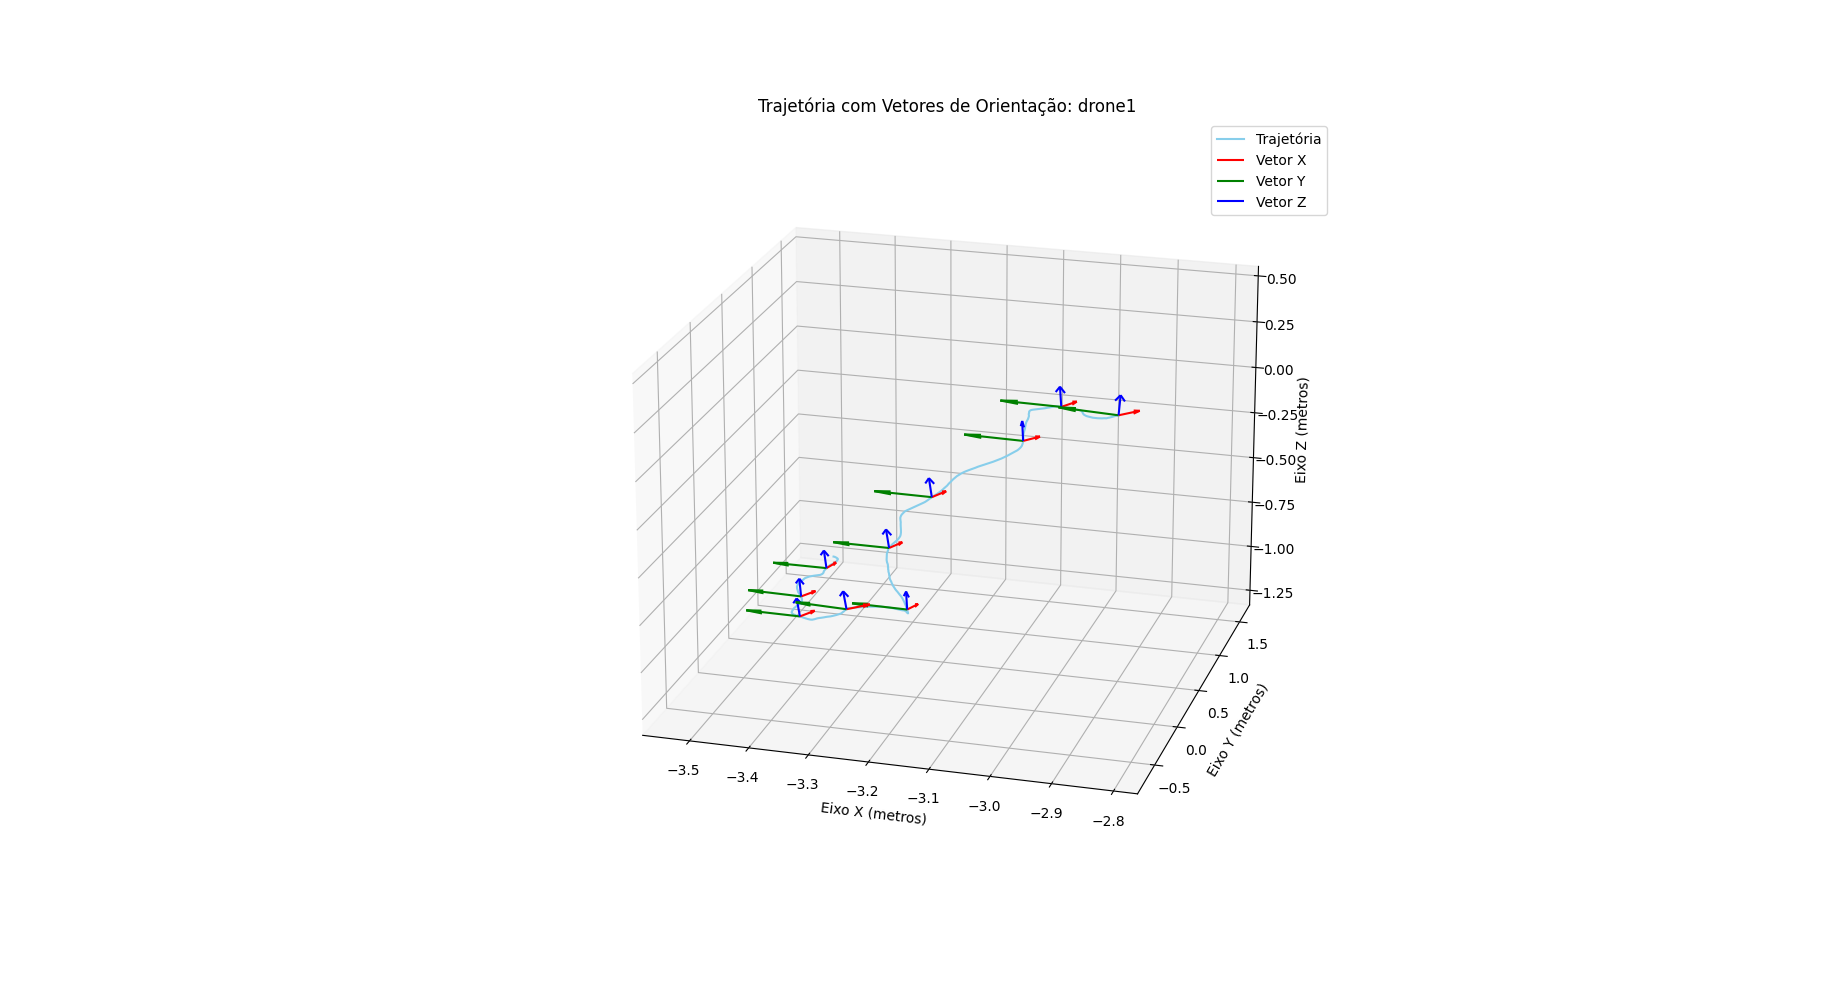

Exemplo de execução do _script_ para o ficheiro _log_ "drone1.txt" com o ficheiro temperatura "temperature_drone.txt


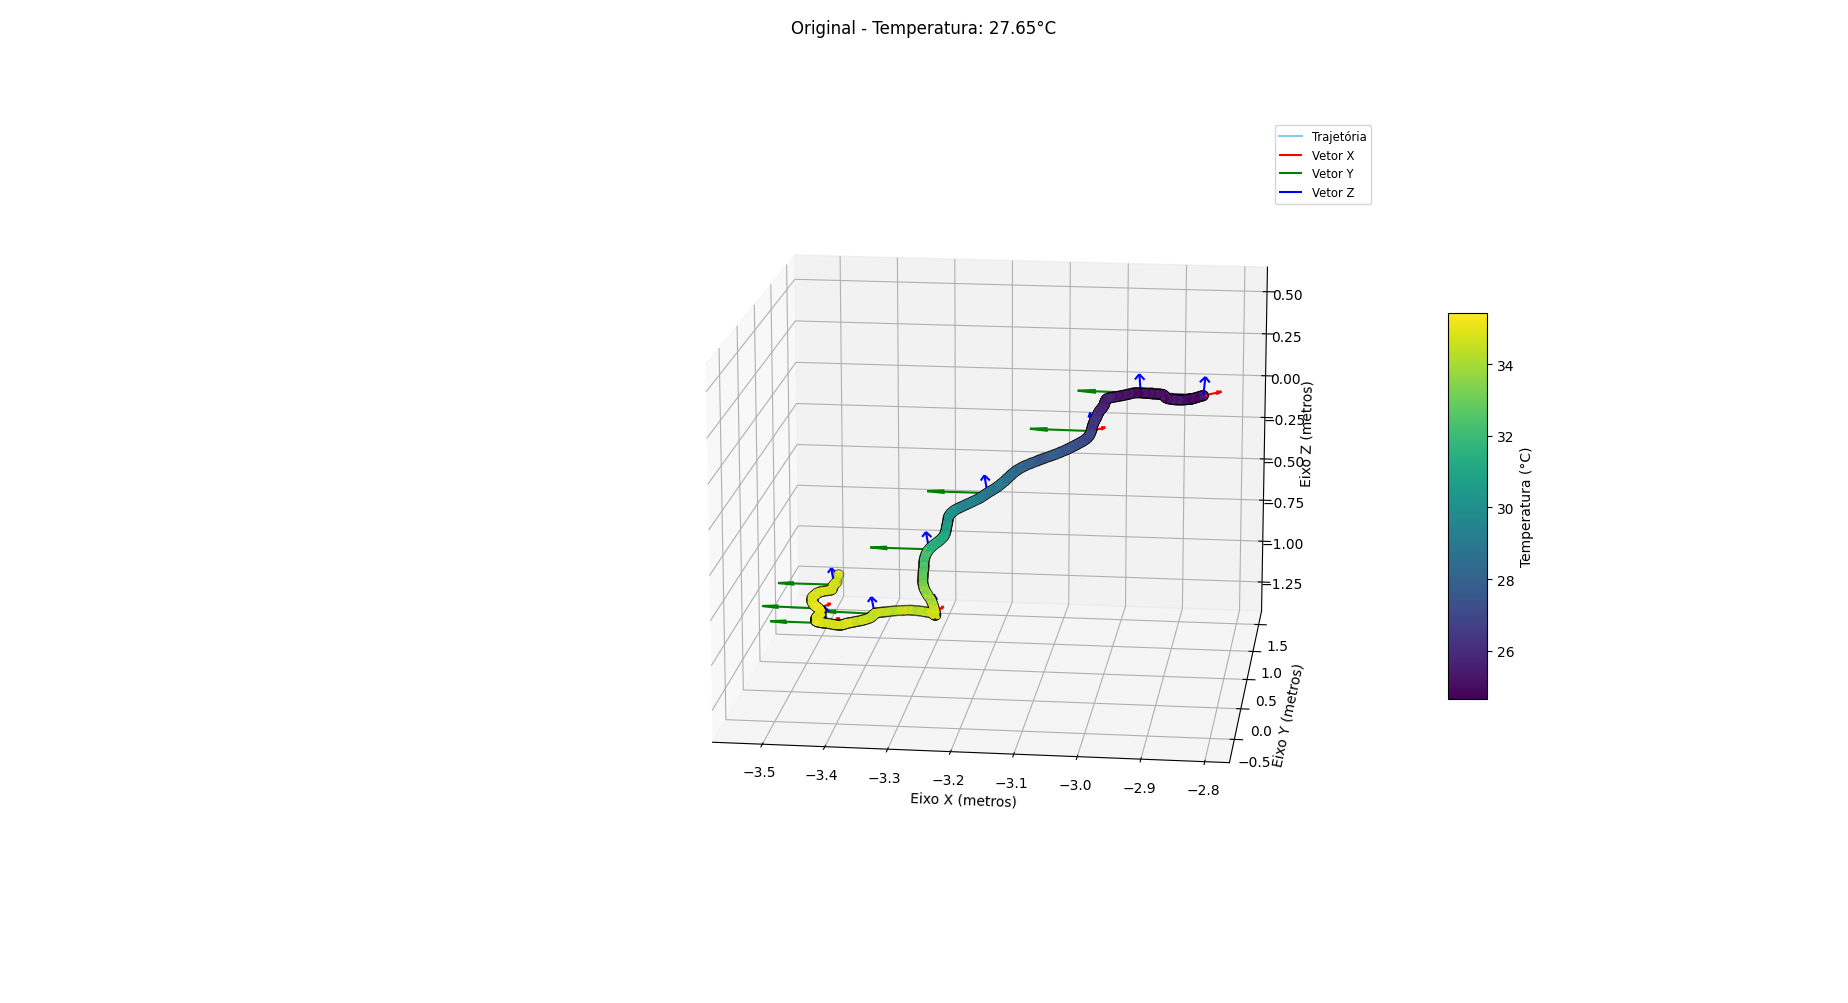

Na imagem anterior mostra a variação da temperatura ao logo da trajetória.

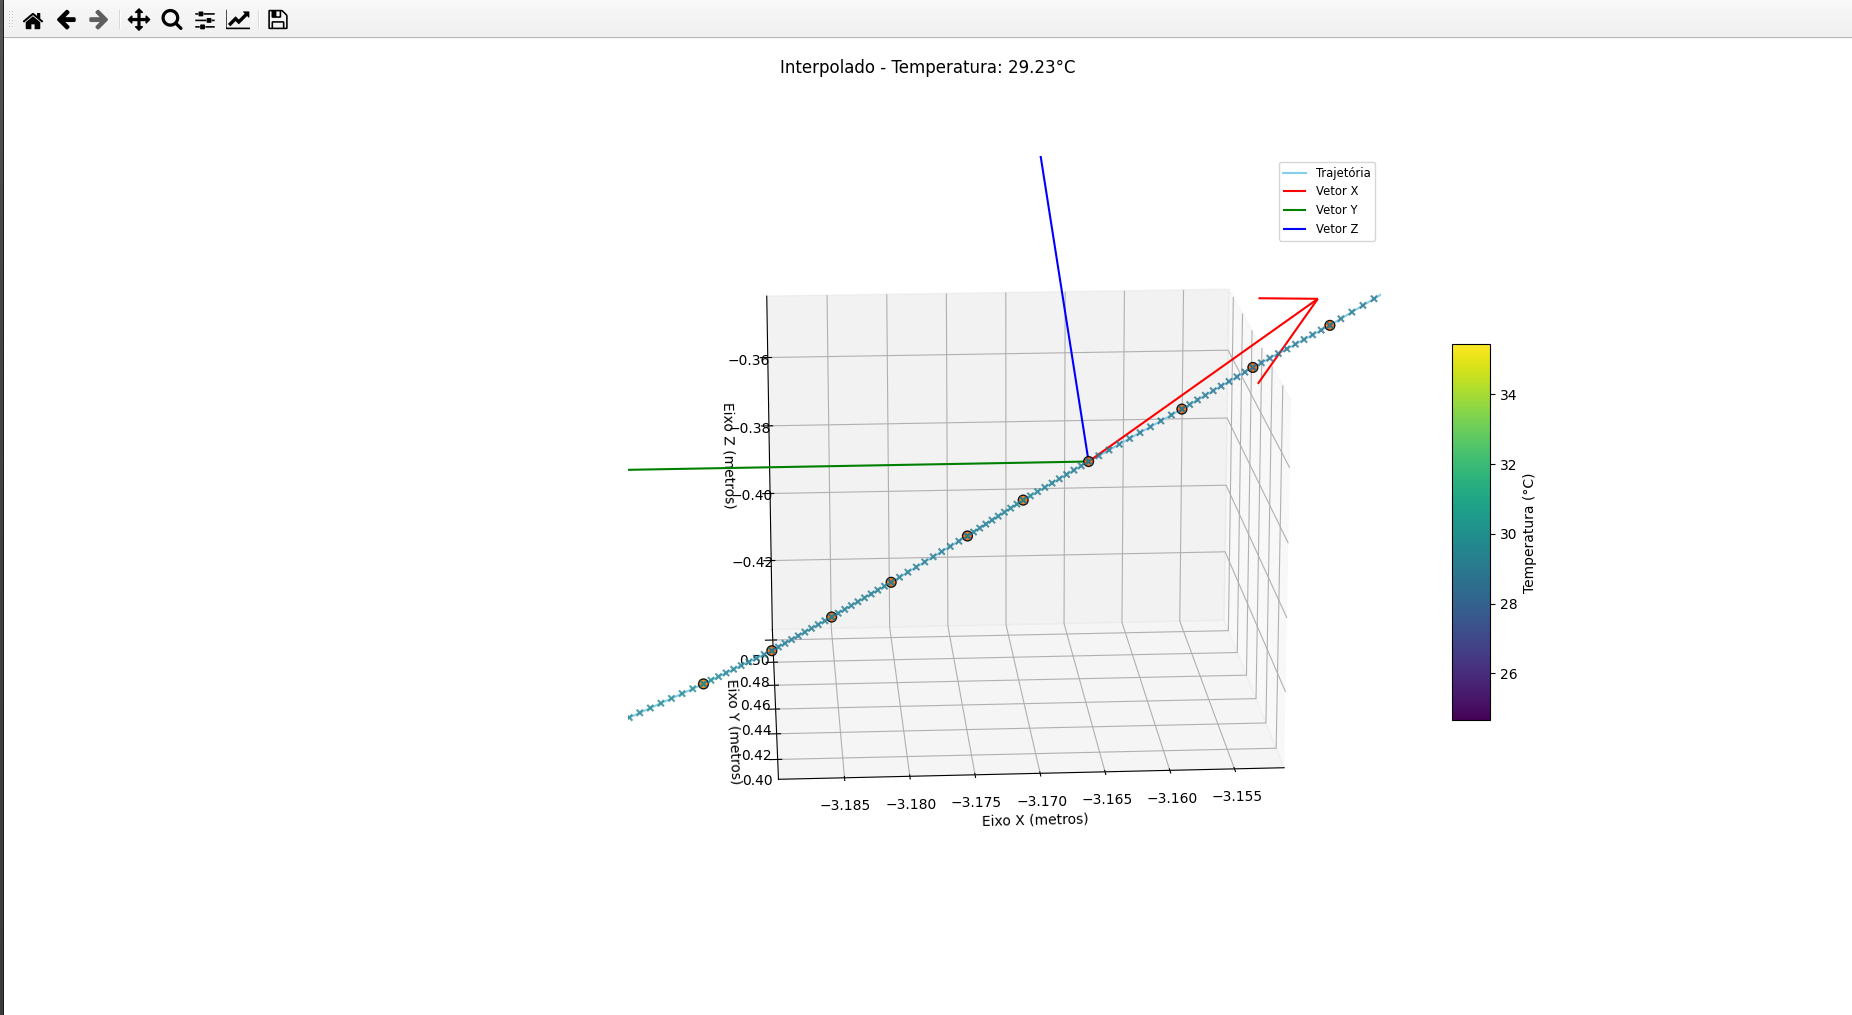


Nesta imagem é possível visualizar a interpolação representada no gráfico.

###  Referências
<span id="ref1">[1] _ieeeauthorcenter.ieee.org_, 2021. [Online]. Available: https://ieeeauthorcenter.ieee.org/wp-content/uploads/IEEE-Reference-Guide.pdf. [Accessed: 17- Oct- 2021].</span>





